<div id="toc"></div>

# Intro

In [80]:
import sys
sys.path.append('../')
from src import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d, Axes3D
%matplotlib inline

In [81]:
def res_plot(T, legend=None):
    K = (T.shape[1] - 2) / 2  # get number of models
    plt.figure(figsize=(9,2.5))
    plt.subplot(131)
    T.tot_ll.plot(color='black')
    plt.title('Log likelihood')
    plt.xlabel("Iteration")
    plt.ylabel("LL")
    plt.subplot(132)
    for k in range(1, K + 1):
        T['p%d' % k].plot()
    plt.title('Class probability')
    plt.xlabel("Iteration")
    plt.ylabel(r"$\pi$")
    plt.subplot(133)
    for k in range(1, K + 1):
        if legend is None:
            T['u%d' % k].plot(label=k)
        else:
            T['u%d' % k].plot(label=legend[k-1])
    plt.title(r'Estimate of $\alpha$')
    plt.xlabel("Iteration")
    plt.ylabel(r"$\theta$")
    plt.legend(frameon=False, loc='upper right')
    plt.tight_layout()

In this notebook we look what different combinations of $r$ and $p$ are identified by our mixed model formulation.
We look at synthetic data, generated with different values of $r$ and $p$.
To recap, $r$ refers to the (inverse) relative importance of friends of friends in choosing how to connect to.
More precisely, $1-r$ is the probability that a new neighbor is chosen from the set of friends of friends,
as opposed to the full set of possible neighbors.
The other parameter $p$, refers to the probability that a new neighbor is chosen through preferential attachment (with $\alpha=1$), as opposed to uniformly at random (with probability $1-p$).

I'm using the following naming convention for the synthetic data: `[gd]-[0:1]-[0:1]-\d.csv`. The first letter represents whether the graph was grown or densified, the second represents $r$, the third $p$ and the last the id of that particular graph (as we may have generated many for that set of parameters.

I'll go through a number of different comparisions to understand how the different parameters constrast with each other.

# Cases

## r=1.00 p=0.50

One comparison we already saw in the `debug_em` report was between $p$ and $\alpha$. A model with $(p=1, \alpha=0.5)$ looks the same, from a likelihood perspective, to the $(p=0.5, \alpha=1)$ values that we used to generate the data. See plot [40] from the "debug EM" report. We first try 2-modes.

[g-1.00-0.50-00.csv] read (163569 x 4)
[g-1.00-0.50-00.csv] [  0/200] (ud) pi_1=0.498 u_1=1.00 (ld) pi_2=0.502 u_2=1.01 (*) tot_ll=35065.3501
[g-1.00-0.50-00.csv] [ 10/200] (ud) pi_1=0.488 u_1=1.00 (ld) pi_2=0.512 u_2=1.00 (*) tot_ll=35064.7231
[g-1.00-0.50-00.csv] [ 20/200] (ud) pi_1=0.479 u_1=1.00 (ld) pi_2=0.521 u_2=0.99 (*) tot_ll=35064.2056
[g-1.00-0.50-00.csv] [ 30/200] (ud) pi_1=0.471 u_1=1.00 (ld) pi_2=0.529 u_2=0.97 (*) tot_ll=35063.7445
[g-1.00-0.50-00.csv] [ 40/200] (ud) pi_1=0.463 u_1=1.00 (ld) pi_2=0.537 u_2=0.96 (*) tot_ll=35063.3314
[g-1.00-0.50-00.csv] [ 50/200] (ud) pi_1=0.456 u_1=1.00 (ld) pi_2=0.544 u_2=0.95 (*) tot_ll=35062.9595
[g-1.00-0.50-00.csv] [ 60/200] (ud) pi_1=0.448 u_1=1.00 (ld) pi_2=0.552 u_2=0.94 (*) tot_ll=35062.6233
[g-1.00-0.50-00.csv] [ 70/200] (ud) pi_1=0.442 u_1=1.00 (ld) pi_2=0.558 u_2=0.93 (*) tot_ll=35062.3180
[g-1.00-0.50-00.csv] [ 80/200] (ud) pi_1=0.435 u_1=1.00 (ld) pi_2=0.565 u_2=0.92 (*) tot_ll=35062.0398
[g-1.00-0.50-00.csv] [ 90/200] (ud

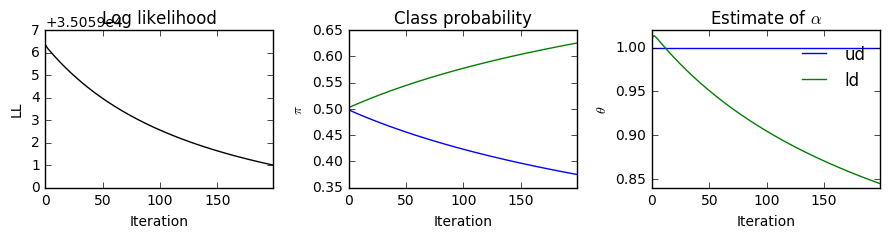

In [65]:
m1a = logit.MixedLogitModel('g-1.00-0.50-00.csv', grouped=False, vvv=1)
m1a.add_uniform_model()
m1a.add_log_degree_model()
T1a = m1a.fit(etol=0.01, n_rounds=200, return_stats=True)
res_plot(T1a, legend=['Uniform','PA'])

As seen before, $\alpha$ gets traded-off for $p$.

Now 2 modes with PA being clamped.

In [47]:
m1b = logit.MixedLogitModel('g-1.00-0.50-00.csv', grouped=False, vvv=1)
m1b.add_uniform_model()
m1b.add_log_degree_model(bounds=((1, 1),))  # clamped at alpha=1 (full PA)
T1b = m1b.fit(etol=0.01, n_rounds=200, return_stats=True)

[g-1.00-0.50-00.csv] read (163569 x 4)
[g-1.00-0.50-00.csv] [  0/200] (ud) pi_1=0.498 u_1=1.00 (ld) pi_2=0.502 u_2=1.00 (*) tot_ll=35065.4826
[g-1.00-0.50-00.csv] [ 10/200] (ud) pi_1=0.486 u_1=1.00 (ld) pi_2=0.514 u_2=1.00 (*) tot_ll=35064.5964
[g-1.00-0.50-00.csv] [ 20/200] (ud) pi_1=0.480 u_1=1.00 (ld) pi_2=0.520 u_2=1.00 (*) tot_ll=35064.3617
[g-1.00-0.50-00.csv] delta in ll (0.009) < etol (0.010), stopping
[g-1.00-0.50-00.csv] u's  = [(ud:1.000), (ld:1.000)]
[g-1.00-0.50-00.csv] pi's = [(ud:0.479), (ld:0.521)]


Now we approximately get the correct [0.5, 0.5] division.

Same settings, but 3-modes - adding `uniform_fof`.
The right outcome class probabilities would be [0.5, 0.5, 0]

[g-1.00-0.50-00.csv] read (163569 x 4)
[g-1.00-0.50-00.csv] [  0/100] (ud) pi_1=0.344 u_1=1.00 (ld) pi_2=0.357 u_2=1.12 (uf) pi_3=0.299 u_3=1.00 (*) tot_ll=35423.4580
[g-1.00-0.50-00.csv] [ 10/100] (ud) pi_1=0.415 u_1=1.00 (ld) pi_2=0.455 u_2=1.08 (uf) pi_3=0.130 u_3=1.00 (*) tot_ll=35153.6432
[g-1.00-0.50-00.csv] [ 20/100] (ud) pi_1=0.436 u_1=1.00 (ld) pi_2=0.492 u_2=1.02 (uf) pi_3=0.072 u_3=1.00 (*) tot_ll=35097.3316
[g-1.00-0.50-00.csv] [ 30/100] (ud) pi_1=0.440 u_1=1.00 (ld) pi_2=0.514 u_2=0.99 (uf) pi_3=0.047 u_3=1.00 (*) tot_ll=35079.4390
[g-1.00-0.50-00.csv] [ 40/100] (ud) pi_1=0.439 u_1=1.00 (ld) pi_2=0.528 u_2=0.97 (uf) pi_3=0.033 u_3=1.00 (*) tot_ll=35072.0396
[g-1.00-0.50-00.csv] [ 50/100] (ud) pi_1=0.435 u_1=1.00 (ld) pi_2=0.540 u_2=0.95 (uf) pi_3=0.025 u_3=1.00 (*) tot_ll=35068.3340
[g-1.00-0.50-00.csv] [ 60/100] (ud) pi_1=0.430 u_1=1.00 (ld) pi_2=0.550 u_2=0.94 (uf) pi_3=0.020 u_3=1.00 (*) tot_ll=35066.1965
[g-1.00-0.50-00.csv] [ 70/100] (ud) pi_1=0.426 u_1=1.00 (ld) pi_2

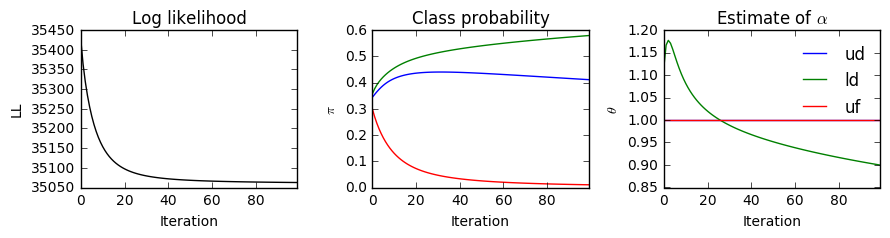

In [66]:
m1c = logit.MixedLogitModel('g-1.00-0.50-00.csv', grouped=False, vvv=1)
m1c.add_uniform_model()
m1c.add_log_degree_model()
m1c.add_uniform_fof_model()
T1c = m1c.fit(etol=0.05, n_rounds=100, return_stats=True)
res_plot(T1c, legend=['Uniform','PA','Uniform FoF'])

Uniform FoF correctly goes to 0, but here the log-degree model also takes over the uniform model, at the cost of $\alpha$.

[g-1.00-0.50-00.csv] read (163569 x 4)
[g-1.00-0.50-00.csv] [  0/100] (ud) pi_1=0.344 u_1=1.00 (ld) pi_2=0.357 u_2=1.00 (uf) pi_3=0.299 u_3=1.00 (*) tot_ll=35438.5100
[g-1.00-0.50-00.csv] [ 10/100] (ud) pi_1=0.390 u_1=1.00 (ld) pi_2=0.484 u_2=1.00 (uf) pi_3=0.126 u_3=1.00 (*) tot_ll=35146.9185
[g-1.00-0.50-00.csv] [ 20/100] (ud) pi_1=0.410 u_1=1.00 (ld) pi_2=0.519 u_2=1.00 (uf) pi_3=0.071 u_3=1.00 (*) tot_ll=35095.2890
[g-1.00-0.50-00.csv] [ 30/100] (ud) pi_1=0.425 u_1=1.00 (ld) pi_2=0.528 u_2=1.00 (uf) pi_3=0.047 u_3=1.00 (*) tot_ll=35079.7168
[g-1.00-0.50-00.csv] [ 40/100] (ud) pi_1=0.436 u_1=1.00 (ld) pi_2=0.530 u_2=1.00 (uf) pi_3=0.034 u_3=1.00 (*) tot_ll=35073.2502
[g-1.00-0.50-00.csv] [ 50/100] (ud) pi_1=0.444 u_1=1.00 (ld) pi_2=0.529 u_2=1.00 (uf) pi_3=0.026 u_3=1.00 (*) tot_ll=35070.0299
[g-1.00-0.50-00.csv] [ 60/100] (ud) pi_1=0.451 u_1=1.00 (ld) pi_2=0.529 u_2=1.00 (uf) pi_3=0.021 u_3=1.00 (*) tot_ll=35068.2343
[g-1.00-0.50-00.csv] [ 70/100] (ud) pi_1=0.455 u_1=1.00 (ld) pi_2

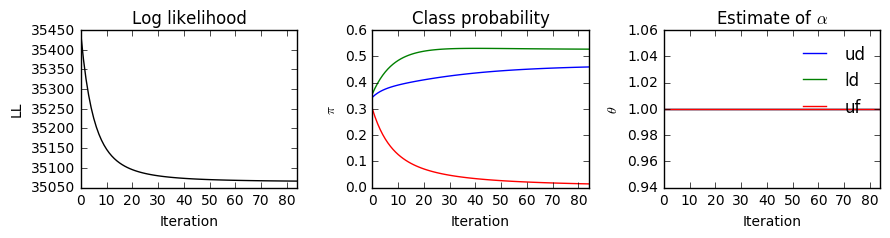

In [64]:
m1d = logit.MixedLogitModel('g-1.00-0.50-00.csv', grouped=False, vvv=1)
m1d.add_uniform_model()
m1d.add_log_degree_model(bounds=((1, 1),))  # clamped at alpha=1 (full PA)
m1d.add_uniform_fof_model()
T1d = m1d.fit(etol=0.05, n_rounds=100, return_stats=True)
res_plot(T1d, legend=['Uniform','Log-Degree','Uniform FoF'])

Now, we get the [0.5, 0.5] division again.

## r=0.50 p=0.00

Case: no PA, 50/50 between uniform and FoF. This simulates the Jackson-Rogers model with $r=0.5$.
The right outcome class probabilities would be [0.5, 0.5]

[g-0.50-0.00-00.csv] read (134948 x 4)
[g-0.50-0.00-00.csv] [  0/100] (ud) pi_1=0.377 u_1=1.00 (uf) pi_2=0.623 u_2=1.00 (*) tot_ll=29017.4269
[g-0.50-0.00-00.csv] [ 10/100] (ud) pi_1=0.066 u_1=1.00 (uf) pi_2=0.934 u_2=1.00 (*) tot_ll=27079.3717
[g-0.50-0.00-00.csv] delta in ll (0.037) < etol (0.050), stopping
[g-0.50-0.00-00.csv] u's  = [(ud:1.000), (uf:1.000)]
[g-0.50-0.00-00.csv] pi's = [(ud:0.059), (uf:0.941)]


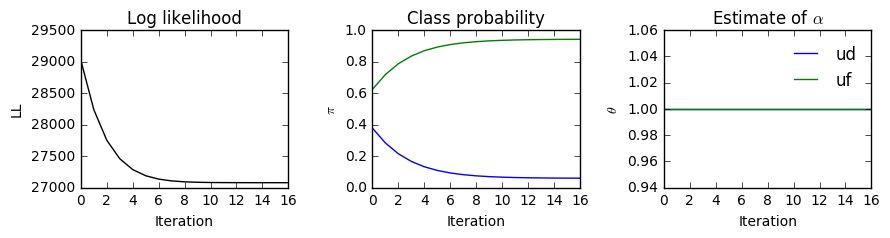

In [61]:
m3a = logit.MixedLogitModel('g-0.50-0.00-00.csv', grouped=False, vvv=1)
m3a.add_uniform_model()
m3a.add_uniform_fof_model()
T3a = m3a.fit(etol=0.05, n_rounds=100, return_stats=True)
res_plot(T3a, legend=['Uniform','Uniform FoF'])

Hmm, it completely prefers uniform FoF over uniform. Should investigate.

In [62]:
np.mean(m2c.models[0].individual_likelihood(1) < m2c.models[1].individual_likelihood(1))

0.37960163613729325

## r=0.50 p=0.50

Both $r$ and $p$ are even, leading to four equally sized modes.


[g-0.50-0.00-00.csv] read (134948 x 4)


../src/logit_individual.py:359: RuntimeWarning: invalid value encountered in divide
  scores_fof = np.array(self.D.loc[self.D.y == 1, 'score']) / np.array(score_tot)


[g-0.50-0.00-00.csv] [  0/100] (u) pi_1=0.197 u_1=1.00 (ld) pi_2=0.186 u_2=1.00 (uf) pi_3=0.317 u_3=1.00 (ldf) pi_4=0.300 u_4=1.00 (*) tot_ll=29351.4364
[g-0.50-0.00-00.csv] [ 10/100] (u) pi_1=0.045 u_1=1.00 (ld) pi_2=0.023 u_2=1.00 (uf) pi_3=0.602 u_3=1.00 (ldf) pi_4=0.330 u_4=1.00 (*) tot_ll=27281.7264
[g-0.50-0.00-00.csv] [ 20/100] (u) pi_1=0.046 u_1=1.00 (ld) pi_2=0.014 u_2=1.00 (uf) pi_3=0.693 u_3=1.00 (ldf) pi_4=0.248 u_4=1.00 (*) tot_ll=27189.5650
[g-0.50-0.00-00.csv] [ 30/100] (u) pi_1=0.049 u_1=1.00 (ld) pi_2=0.010 u_2=1.00 (uf) pi_3=0.749 u_3=1.00 (ldf) pi_4=0.192 u_4=1.00 (*) tot_ll=27145.4115
[g-0.50-0.00-00.csv] [ 40/100] (u) pi_1=0.051 u_1=1.00 (ld) pi_2=0.008 u_2=1.00 (uf) pi_3=0.787 u_3=1.00 (ldf) pi_4=0.154 u_4=1.00 (*) tot_ll=27121.5812
[g-0.50-0.00-00.csv] [ 50/100] (u) pi_1=0.052 u_1=1.00 (ld) pi_2=0.007 u_2=1.00 (uf) pi_3=0.814 u_3=1.00 (ldf) pi_4=0.127 u_4=1.00 (*) tot_ll=27107.7168
[g-0.50-0.00-00.csv] [ 60/100] (u) pi_1=0.053 u_1=1.00 (ld) pi_2=0.006 u_2=1.00 (u

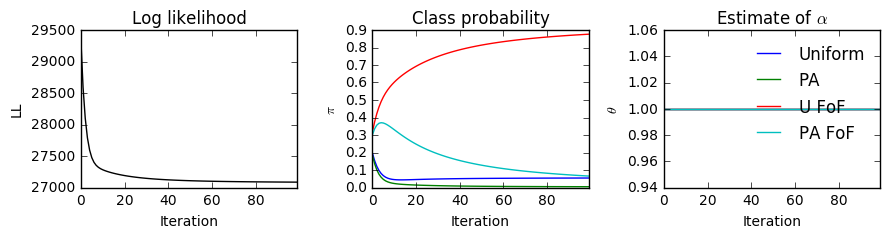

In [135]:
m4a = logit.MixedLogitModel('g-0.50-0.00-00.csv', grouped=False, vvv=1)
m4a.add_uniform_model()
m4a.add_log_degree_model(bounds=((1, 1),))  # clamped at alpha=1 (full PA)
m4a.add_uniform_fof_model()
m4a.add_log_degree_fof_model(bounds=((1, 1),))  # clamped at alpha=1 (full PA)
T4a = m4a.fit(etol=0.05, n_rounds=100, return_stats=True)
res_plot(T4a, legend=['Uniform','PA','U FoF', 'PA FoF'])

Here too, the FoF modes overtake the uniform ones.

## r=0.00 p=0.00

Case where only FoF, no PA.
The right outcome class probabilities would be [0, 0, 1]

[g-0.00-0.00-00.csv] read (129970 x 4)
[g-0.00-0.00-00.csv] [  0/100] (ud) pi_1=0.182 u_1=1.00 (ld) pi_2=0.202 u_2=1.37 (uf) pi_3=0.616 u_3=1.00 (*) tot_ll=16629.1606
[g-0.00-0.00-00.csv] [ 10/100] (ud) pi_1=0.000 u_1=1.00 (ld) pi_2=0.000 u_2=5.35 (uf) pi_3=1.000 u_3=1.00 (*) tot_ll=10867.8813
[g-0.00-0.00-00.csv] delta in ll (0.045) < etol (0.050), stopping
[g-0.00-0.00-00.csv] u's  = [(ud:1.000), (ld:7.915), (uf:1.000)]
[g-0.00-0.00-00.csv] pi's = [(ud:0.000), (ld:0.000), (uf:1.000)]


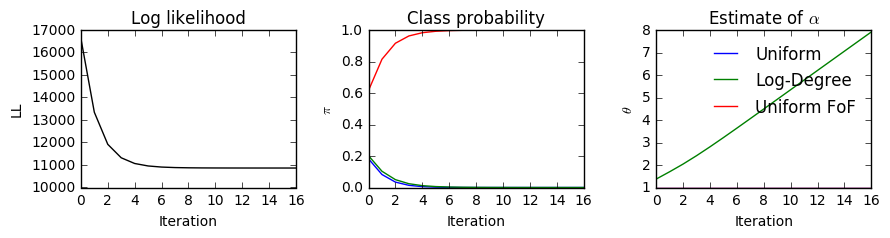

In [72]:
m2a = logit.MixedLogitModel('g-0.00-0.00-00.csv', grouped=False, vvv=1)
m2a.add_uniform_model()
m2a.add_log_degree_model()
m2a.add_uniform_fof_model()
T2a = m2a.fit(etol=0.05, n_rounds=100, return_stats=True)
res_plot(T2a, legend=['Uniform','Log-Degree','Uniform FoF'])

Correct

## All (3x3)

Let's try looking at all combinations, in steps of 0.5.
We clamp $\alpha=1$, so only the class probabilities matter.
Every model is run on once generated network (id=00) and gets up to 50 steps.
Not all models converge in 50 steps, but this keeps the wait time within reasonable bounds for now.

In [136]:
res = []
for r in [0, 0.5, 1]:
    for p in [0, 0.5, 1]:
        print(r, p)
        m = logit.MixedLogitModel('g-%.2f-%.2f-00.csv' % (r, p), grouped=False, vvv=0)
        m.add_uniform_model()
        m.add_log_degree_model(bounds=((1, 1),))  # clamped at alpha=1 (full PA)
        m.add_uniform_fof_model()
        m.add_log_degree_fof_model(bounds=((1, 1),))     # clamped at alpha=1 (full PA)
        m.fit(etol=0.05, n_rounds=100, return_stats=False)
        res.append([r, p] + m.pk.values())

(0, 0)
(0, 0.5)
(0, 1)
(0.5, 0)
(0.5, 0.5)
(0.5, 1)
(1, 0)
(1, 0.5)
(1, 1)


In [137]:
expected = [
  [0.00, 0.00, 1.00, 0.00], 
  [0.00, 0.00, 0.50, 0.50], 
  [0.00, 0.00, 0.00, 1.00], 
  [0.50, 0.00, 0.50, 0.00], 
  [0.25, 0.25, 0.25, 0.25], 
  [0.00, 0.50, 0.00, 0.50], 
  [1.00, 0.00, 0.00, 0.00], 
  [0.50, 0.50, 0.00, 0.00], 
  [0.00, 1.00, 0.00, 0.00]]

print("                    Actual                 Expected")
print("   r    p      ud   ld   uf   lf        ud   ld   uf   lf")
for i in range(len(res)):
    print("%.2f %.2f   [%.2f %.2f %.2f %.2f]    [%.2f %.2f %.2f %.2f]" % tuple(res[i] + expected[i]))

                    Actual                 Expected
   r    p      ud   ld   uf   lf        ud   ld   uf   lf
0.00 0.00   [0.00 0.00 0.85 0.15]    [0.00 0.00 1.00 0.00]
0.00 0.50   [0.00 0.00 0.50 0.50]    [0.00 0.00 0.50 0.50]
0.00 1.00   [0.00 0.00 0.19 0.81]    [0.00 0.00 0.00 1.00]
0.50 0.00   [0.05 0.00 0.88 0.07]    [0.50 0.00 0.50 0.00]
0.50 0.50   [0.05 0.06 0.37 0.52]    [0.25 0.25 0.25 0.25]
0.50 1.00   [0.00 0.21 0.00 0.78]    [0.00 0.50 0.00 0.50]
1.00 0.00   [0.94 0.04 0.02 0.00]    [1.00 0.00 0.00 0.00]
1.00 0.50   [0.47 0.52 0.01 0.01]    [0.50 0.50 0.00 0.00]
1.00 1.00   [0.00 1.00 0.00 0.00]    [0.00 1.00 0.00 0.00]


There are things to look for.
First, does varying $r$ lead to correctly putting weight on/off the FoF modes?

* when $r=0.00$, the uniform modes are correctly set to 0.
* however, when $0 < r < 1$, the FoF modes seem generally dominate the uniform modes.
* when $r=1.00$, the FoF modes go to 0 (but more slowly).

Secondly, for different values of $r$, does varying $p$ lead to correctly putting weight on/off the log-degree modes?

* when $r=0.00$ (so only FoF connections happen), uniform FoF has a slight disadvantage with low $p$ and a slight advantage for high $p$. It seems like neither case can carry the all the weight. However, this might be an artifact to the limited number of iterations (100).
* when $0 < r < 1$, because of the weight towards the FoF modes, there is generally a bias away from the uniform modes.
* when $r=1.00$, we get approximately the correct weight distribution, with a slight bias for low $p$.

# Sandbox

In [138]:
# https://stackoverflow.com/questions/437589/how-do-i-unload-reload-a-python-module
import imp
logit = imp.reload(logit)
logit_individual = imp.reload(logit_individual)
from src.logit import MixedLogitModel
from src.logit_individual import *

In [141]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')
// https://github.com/kmahelona/ipython_notebook_goodies

<IPython.core.display.Javascript object>